## Importing training data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import r2_score
data=pd.read_excel("Final_data_2.xlsx")

## Data format

In [2]:
data.head()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
0,1,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.558633,0.190752,0.681740,0.965801,0.359087,0.577455,0.172559,0.733785,0.941978,0.000000
1,2,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.531501,0.217852,0.600192,0.989859,0.475393,0.545543,0.204424,0.641217,0.979643,0.000000
2,3,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.623444,0.126020,0.851167,0.855924,0.472248,0.635529,0.114573,0.875928,0.829663,0.000000
3,4,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.669254,0.080266,0.937664,0.741765,0.591015,0.673493,0.076666,0.943093,0.731664,0.035185
4,5,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.698923,0.050633,0.974850,0.656581,0.641152,0.701128,0.049073,0.976413,0.651756,0.120988


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121581 entries, 0 to 121580
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   time_idx                          121581 non-null  int64  
 1   hour_of_day                       121581 non-null  float64
 2   hour_of_day_cos                   121581 non-null  float64
 3   hour_of_day_sin                   121581 non-null  float64
 4   month_of_year                     121581 non-null  float64
 5   month_of_year_cos                 121581 non-null  float64
 6   month_of_year_sin                 121581 non-null  float64
 7   season_of_year                    121581 non-null  float64
 8   season_of_year_cos                121581 non-null  float64
 9   season_of_year_sin                121581 non-null  float64
 10  sunposition_thetaZ                121581 non-null  float64
 11  sunposition_solarAzimuth          121581 non-null  f

In [4]:
hours=((data["hour_of_day"]*23).astype(int))
for i in range (0,data.shape[0]):
  if(hours[i]>20):
    data['power_normed'][i]=0

<ipython-input-4-6dbfa0b712dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['power_normed'][i]=0


## Weather input

In [5]:
X_train=data.drop('power_normed',axis=1)
X_train=X_train.drop('time_idx',axis=1)
X_train

,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,sunposition_thetaZ,...,LowerWindSpeed,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin
0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,1.000000,...,0.294080,0.558633,0.190752,0.681740,0.965801,0.359087,0.577455,0.172559,0.733785,0.941978
1,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,1.000000,...,0.399157,0.531501,0.217852,0.600192,0.989859,0.475393,0.545543,0.204424,0.641217,0.979643
2,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,1.000000,...,0.410575,0.623444,0.126020,0.851167,0.855924,0.472248,0.635529,0.114573,0.875928,0.829663
3,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,0.708461,...,0.581901,0.669254,0.080266,0.937664,0.741765,0.591015,0.673493,0.076666,0.943093,0.731664
4,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,0.642045,...,0.653922,0.698923,0.050633,0.974850,0.656581,0.641152,0.701128,0.049073,0.976413,0.651756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121576,0.428571,0.661157,0.944463,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.807295,...,0.152602,0.721262,0.028488,0.991899,0.589639,0.172142,0.725055,0.025796,0.993444,0.580706
121577,0.571429,0.455788,1.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.717106,...,0.152272,0.711883,0.037864,0.985771,0.618434,0.206086,0.722674,0.028174,0.992183,0.588069
121578,0.714286,0.256176,0.889960,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.951496,...,0.176021,0.665760,0.083973,0.931721,0.752225,0.263062,0.688577,0.062233,0.962257,0.690574
121579,0.857143,0.095371,0.632563,1.000000,0.000000,0.000000,1.0,0.0,0.0,1.000000,...,0.182107,0.735727,0.014028,0.998002,0.544655,0.264884,0.748439,0.002438,0.999941,0.507687


In [6]:
y_train=data['power_normed']
y_train

0         0.000000
1         0.000000
2         0.000000
3         0.035185
4         0.120988
            ...   
121576    0.030207
121577    0.073470
121578    0.008170
121579    0.000000
121580    0.000000
Name: power_normed, Length: 121581, dtype: float64

In [7]:
X_train.shape

(121581, 49)

## Importing test data

In [8]:
weather_data_test=pd.read_excel("test_data.xlsx")

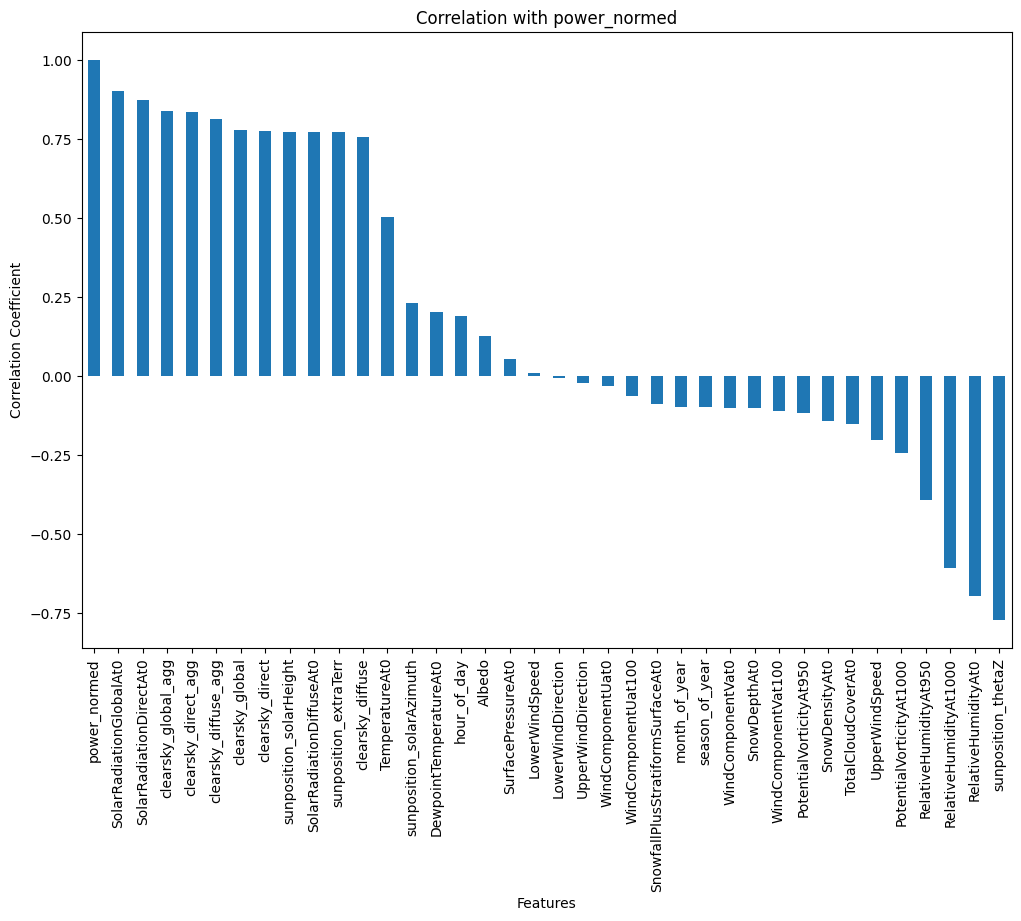

In [9]:
# Select the 'power_normed' feature and other features of interest
features_of_interest = [
    'power_normed', 'hour_of_day',
    'month_of_year',
    'season_of_year',
    'sunposition_thetaZ', 'sunposition_solarAzimuth', 'sunposition_extraTerr',
    'sunposition_solarHeight', 'clearsky_diffuse', 'clearsky_direct',
    'clearsky_global', 'clearsky_diffuse_agg', 'clearsky_direct_agg',
    'clearsky_global_agg', 'Albedo', 'WindComponentUat0', 'WindComponentVat0',
    'WindComponentUat100', 'WindComponentVat100', 'DewpointTemperatureAt0',
    'TemperatureAt0', 'PotentialVorticityAt1000', 'PotentialVorticityAt950',
    'RelativeHumidityAt1000', 'RelativeHumidityAt950', 'RelativeHumidityAt0',
    'SnowDensityAt0', 'SnowDepthAt0', 'SnowfallPlusStratiformSurfaceAt0',
    'SurfacePressureAt0', 'SolarRadiationGlobalAt0', 'SolarRadiationDirectAt0',
    'SolarRadiationDiffuseAt0', 'TotalCloudCoverAt0', 'LowerWindSpeed',
    'LowerWindDirection','UpperWindSpeed', 'UpperWindDirection'
]
# Calculate the correlation coefficients
correlation_matrix = data[features_of_interest].corr()

# Create a bar chart to visualize correlations
plt.figure(figsize=(12, 8))
correlation_matrix['power_normed'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with power_normed')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [10]:
# Spearman Rank Correlation (for non-normally distributed data)
spearman_corr = data[['sunposition_thetaZ', 'power_normed']].corr(method='spearman')
print("\nSpearman Rank Correlation:")
print(spearman_corr)


Spearman Rank Correlation:
                    sunposition_thetaZ  power_normed
sunposition_thetaZ            1.000000     -0.885801
power_normed                 -0.885801      1.000000


0.714285714285714


<BarContainer object of 365 artists>

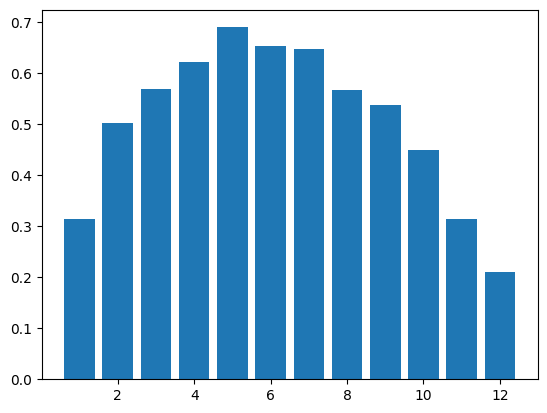

In [11]:
# months=((data["month_of_year"][0:2920]*11)+1)
peak=data["hour_of_day"][5]
print(peak)
hours = data[data["hour_of_day"]==peak]
plt.bar(((hours["month_of_year"][0:365]*11)+1),hours["power_normed"][0:365])
# plt.bar(((hours["month_of_year"][0:365]*11)+1),data["power_normed"][0:2920])

In [12]:
# Kendall Tau Rank Correlation (for ordinal data)
kendall_corr = data[['SolarRadiationGlobalAt0', 'power_normed']].corr(method='kendall')
print("\nKendall Tau Rank Correlation:")
print(kendall_corr)


# Kendall Tau Rank Correlation (for ordinal data)
kendall_corr = data[['SolarRadiationDirectAt0', 'power_normed']].corr(method='kendall')
print("\nKendall Tau Rank Correlation:")
print(kendall_corr)


# Kendall Tau Rank Correlation (for ordinal data)
kendall_corr = data[['sunposition_thetaZ', 'power_normed']].corr(method='kendall')
print("\nKendall Tau Rank Correlation:")
print(kendall_corr)


# Kendall Tau Rank Correlation (for ordinal data)
kendall_corr = data[['RelativeHumidityAt0', 'power_normed']].corr(method='kendall')
print("\nKendall Tau Rank Correlation:")
print(kendall_corr)


Kendall Tau Rank Correlation:
                         SolarRadiationGlobalAt0  power_normed
SolarRadiationGlobalAt0                 1.000000      0.852694
power_normed                            0.852694      1.000000

Kendall Tau Rank Correlation:
                         SolarRadiationDirectAt0  power_normed
SolarRadiationDirectAt0                 1.000000      0.820879
power_normed                            0.820879      1.000000

Kendall Tau Rank Correlation:
                    sunposition_thetaZ  power_normed
sunposition_thetaZ            1.000000     -0.748028
power_normed                 -0.748028      1.000000

Kendall Tau Rank Correlation:
                     RelativeHumidityAt0  power_normed
RelativeHumidityAt0             1.000000     -0.456576
power_normed                   -0.456576      1.000000


In [15]:
X_test=weather_data_test.drop('power_normed',axis=1)
X_test=X_test.drop('time_idx',axis=1)
y_test=weather_data_test['power_normed']

### Processing our Training data for feeding in LSTM network

In [16]:
def sequential_form(input_data, output_data, prev_steps):

    X, y = list(), list()
    for i in range(input_data.shape[0]):
        end = i + prev_steps
        if end >= input_data.shape[0]:
            break
        seq_X = input_data[i:end]
        seq_y = output_data[end]
        X.append(seq_X)
        y.append(seq_y)
    x_seq = np.array(X)
    y_seq = np.array(y)
    return x_seq, y_seq

### LSTM

In [17]:

num_steps =24
# training set
(x_train_seq,
 y_train_seq) = sequential_form(X_train, y_train, prev_steps=num_steps)
assert x_train_seq.shape[0] == y_train_seq.shape[0]
# test set
(x_test_seq,
 y_test_seq) = sequential_form(X_test, y_test, prev_steps=num_steps)

### Building first LSTM Model for forecasting

In [18]:
lstm = Sequential()
lstm.add(LSTM(units = 100, return_sequences = True, input_shape = (24,49)))
lstm.add(Dropout(0.2))

lstm.add(LSTM(units = 120, return_sequences = True))
lstm.add(Dropout(0.25))

lstm.add(LSTM(units = 64, return_sequences = True))
lstm.add(Dropout(0.25))

lstm.add(LSTM(units = 56))
lstm.add(Dropout(0.25))



lstm.add(Dense(units = 1))

lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

trained_model=lstm.fit(x_train_seq, y_train_seq, epochs = 50, batch_size = 20)

Epoch 1/50
6078/6078 [==============================] - 92s 13ms/step - loss: 0.0106
Epoch 2/50
6078/6078 [==============================] - 71s 12ms/step - loss: 0.0077
Epoch 3/50
6078/6078 [==============================] - 75s 12ms/step - loss: 0.0074
Epoch 4/50
6078/6078 [==============================] - 72s 12ms/step - loss: 0.0071
Epoch 5/50
6078/6078 [==============================] - 73s 12ms/step - loss: 0.0069
Epoch 6/50
6078/6078 [==============================] - 75s 12ms/step - loss: 0.0068
Epoch 7/50
6078/6078 [==============================] - 71s 12ms/step - loss: 0.0066
Epoch 8/50
6078/6078 [==============================] - 73s 12ms/step - loss: 0.0065
Epoch 9/50
6078/6078 [==============================] - 72s 12ms/step - loss: 0.0063
Epoch 10/50
6078/6078 [==============================] - 71s 12ms/step - loss: 0.0062
Epoch 11/50
6078/6078 [==============================] - 73s 12ms/step - loss: 0.0060
Epoch 12/50
6078/6078 [==============================] - 70s 12

In [19]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           60000     
                                                                 
 dropout (Dropout)           (None, 24, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 120)           106080    
                                                                 
 dropout_1 (Dropout)         (None, 24, 120)           0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 64)            47360     
                                                                 
 dropout_2 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 56)                2

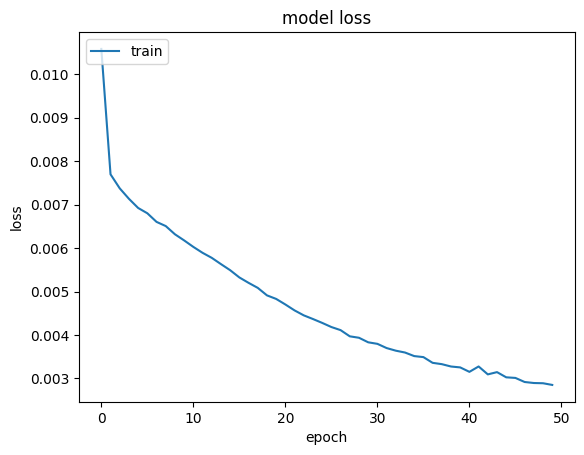

In [20]:
plt.plot(trained_model.history['loss'])
# plt.plot(trained_model.history['val_loss'])
# plt.plot(trained_model.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
prediction=lstm.predict(x_test_seq)

154/154 [==============================] - 3s 5ms/step


In [22]:
output=weather_data_test.tail(4926)
output

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
24,25,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.000000,...,0.735600,0.014445,0.997811,0.546734,0.214409,0.751715,0.998692,0.999982,0.495768,0.000000
25,26,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.000000,...,0.784042,0.966678,0.989022,0.395791,0.355050,0.800515,0.949894,0.975411,0.345132,0.058273
26,27,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.000000,...,0.786881,0.963846,0.987091,0.387109,0.389595,0.790498,0.959911,0.984206,0.375324,0.394484
27,28,0.714286,0.256176,0.889960,0.909091,0.017332,0.258819,1.0,0.0,0.000000,...,0.764770,0.985910,0.998013,0.455464,0.360069,0.772931,0.977477,0.994989,0.429390,0.184173
28,29,0.857143,0.095371,0.632563,0.909091,0.017332,0.258819,1.0,0.0,0.000000,...,0.708807,0.041181,0.983000,0.629265,0.249931,0.739945,0.009960,0.998930,0.532701,0.000240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,4946,0.571429,0.455788,1.000000,1.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.485657,0.263862,0.455531,0.998019,0.353568,0.504199,0.245691,0.512472,0.999845,0.001679
4946,4947,0.714286,0.256176,0.889960,1.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.503385,0.246170,0.511019,0.999879,0.345779,0.524165,0.225726,0.574880,0.994361,0.005995
4947,4948,0.857143,0.095371,0.632563,1.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.551758,0.197900,0.659730,0.973800,0.321798,0.579205,0.170690,0.737938,0.939756,0.000000
4948,4949,1.000000,0.000000,0.270427,1.000000,0.000000,0.000000,1.0,0.0,0.000000,...,0.587694,0.162039,0.761493,0.926170,0.343239,0.606654,0.143242,0.809838,0.892429,0.000000


In [23]:
output['Predicted_output']=prediction

<ipython-input-23-5ffd14e88f4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predicted_output']=prediction


In [24]:

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=output.reset_index()['time_idx'], y=output.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=output.reset_index()['time_idx'], y=output.reset_index()['Predicted_output'],name='Predicted generated solar power LSTM '),row=1,col=1
)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

In [25]:
rmse_LSTM= (mean_squared_error(output['power_normed'],output['Predicted_output']))
print(rmse_LSTM)

0.004905029034010548


In [26]:
r2 = r2_score(output['power_normed'],output['Predicted_output'])
print('r2 score for this model is', r2)

r2 score for this model is 0.7794310560354641


In [27]:
mae_lstm = mean_absolute_error(output['power_normed'],output['Predicted_output'])
print('mae for this model is',mae_lstm)

mae for this model is 0.03074726582297844


In [32]:
from sklearn.metrics import mean_squared_error

Y_true = output['power_normed']

Y_pred = output['Predicted_output']

mean_squared_error(Y_true,Y_pred)

0.004905029034010548